# Limpieza y Alistamiento de Datos
### Datos ICFES Pacifico 2014-2016

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_61924/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 0. Importación de Datos e informacion del df

In [2]:
df = pd.read_csv('Pacifico.csv')

In [3]:
# Contar el número de observaciones (filas)
num_observations = len(df)

# Mostrar el resultado
print(f"El numero de observaciones es: {num_observations}")

El numero de observaciones es: 259096


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259096 entries, 0 to 259095
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   periodo                        259096 non-null  int64  
 1   estu_tipodocumento             259096 non-null  object 
 2   estu_consecutivo               259096 non-null  object 
 3   cole_area_ubicacion            259091 non-null  object 
 4   cole_bilingue                  231118 non-null  object 
 5   cole_calendario                259096 non-null  object 
 6   cole_caracter                  257199 non-null  object 
 7   cole_cod_dane_establecimiento  258934 non-null  float64
 8   cole_cod_dane_sede             259096 non-null  int64  
 9   cole_cod_depto_ubicacion       259096 non-null  int64  
 10  cole_cod_mcpio_ubicacion       259096 non-null  int64  
 11  cole_codigo_icfes              259096 non-null  int64  
 12  cole_depto_ubicacion          

## 1. Valores Faltantes

In [5]:

print(df.isnull().sum())

periodo                              0
estu_tipodocumento                   0
estu_consecutivo                     0
cole_area_ubicacion                  5
cole_bilingue                    27978
cole_calendario                      0
cole_caracter                     1897
cole_cod_dane_establecimiento      162
cole_cod_dane_sede                   0
cole_cod_depto_ubicacion             0
cole_cod_mcpio_ubicacion             0
cole_codigo_icfes                    0
cole_depto_ubicacion                 0
cole_genero                          0
cole_jornada                         0
cole_mcpio_ubicacion                 0
cole_naturaleza                      0
cole_nombre_establecimiento          0
cole_nombre_sede                     0
cole_sede_principal                  0
estu_cod_depto_presentacion        968
estu_cod_mcpio_presentacion         44
estu_cod_reside_depto                3
estu_cod_reside_mcpio                3
estu_depto_presentacion             44
estu_depto_reside        

Se eliminan las filas donde no esta el valor global, dado que esta es la base de las preguntas que se busca responder.

In [6]:
# Eliminar filas donde 'PUNT_GLOBAL' tiene valores faltantes
df_cleaned = df.dropna(subset=['punt_global'])

# Mostrar el número de filas antes y después de eliminar valores faltantes
print(f"Numero de columnas antes de la limpieza: {len(df)}")
print(f"Numero de columnas despues de la limpieza: {len(df_cleaned)}")


Numero de columnas antes de la limpieza: 259096
Numero de columnas despues de la limpieza: 248787


Si se eliminan las filas faltantes de $fami tienelavadora$ se logra eliminar las filas faltantes de las demas variables socieconomicas.

In [7]:
# Eliminar filas donde 'fami_tienelavadora' tiene valores faltantes
df_cleaned = df_cleaned.dropna(subset=['fami_tienelavadora'])

Se elimina los valores con muchas filas faltantes. En esta parte sale la variable de $cole bilingue$

In [8]:
# 1. Eliminar columnas con demasiados valores faltantes (por ejemplo, más del 90% de valores faltantes)
threshold = len(df) * 0.90
df_cleaned = df_cleaned.dropna(axis=1, thresh=threshold)

# Identificar columnas que serán eliminadas
columns_to_drop = df_cleaned.columns[df_cleaned.isnull().sum() > threshold]

# Mostrar columnas que serán eliminadas
print("Columns to be dropped due to too many missing values (more than 90% missing):")
print(columns_to_drop)

Columns to be dropped due to too many missing values (more than 90% missing):
Index([], dtype='object')


Se elimina los otros datos nulos de las demas columnas

In [9]:
# Elimino los datos nulos de las columnas de presentacion
df_cleaned = df_cleaned.dropna(subset=['estu_cod_depto_presentacion'])
df_cleaned = df_cleaned.dropna(subset=['estu_cod_mcpio_presentacion'])
df_cleaned = df_cleaned.dropna(subset=['estu_mcpio_reside'])
df_cleaned = df_cleaned.dropna(subset=['cole_caracter'])
df_cleaned = df_cleaned.dropna(subset=['estu_genero'])

Verificamos si logro limpiar la base por completo.

In [10]:
# Check for missing values
print(df_cleaned.isnull().sum())

periodo                          0
estu_tipodocumento               0
estu_consecutivo                 0
cole_area_ubicacion              0
cole_calendario                  0
cole_caracter                    0
cole_cod_dane_establecimiento    0
cole_cod_dane_sede               0
cole_cod_depto_ubicacion         0
cole_cod_mcpio_ubicacion         0
cole_codigo_icfes                0
cole_depto_ubicacion             0
cole_genero                      0
cole_jornada                     0
cole_mcpio_ubicacion             0
cole_naturaleza                  0
cole_nombre_establecimiento      0
cole_nombre_sede                 0
cole_sede_principal              0
estu_cod_depto_presentacion      0
estu_cod_mcpio_presentacion      0
estu_cod_reside_depto            0
estu_cod_reside_mcpio            0
estu_depto_presentacion          0
estu_depto_reside                0
estu_estadoinvestigacion         0
estu_estudiante                  0
estu_fechanacimiento             0
estu_genero         

## 2. Criterios de Selección

#### Residencia y presentación de la prueba

Quitamos los estudiantes que no residen o que no lo presentaron en el pacifico

In [11]:
#estu_depto_presentacion, estu_depto_reside
deptos_validos = ['CHOCO', 'VALLE', 'CAUCA', 'NARIÑO']
df_cleaned = df_cleaned[df_cleaned['estu_depto_presentacion'].isin(deptos_validos) & df['estu_depto_reside'].isin(deptos_validos)]

print(df_cleaned['estu_depto_presentacion'].value_counts(dropna=False))
print(df_cleaned['estu_depto_reside'].value_counts(dropna=False))

/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_61924/1896747157.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df_cleaned['estu_depto_presentacion'].isin(deptos_validos) & df['estu_depto_reside'].isin(deptos_validos)]


estu_depto_presentacion
VALLE     137872
NARIÑO     51430
CAUCA      42399
CHOCO      11935
Name: count, dtype: int64
estu_depto_reside
VALLE     137539
NARIÑO     51238
CAUCA      42795
CHOCO      12064
Name: count, dtype: int64


Miramos cuantos estudiantes presentan el examen en el mismo municipio que viven. Solo para ver si es necesario definir otro criterio.

In [12]:
# Suponiendo que tienes un DataFrame llamado df con las columnas 'cole_mcpio_ubicacion' y 'estu_mcpio_presentacion'
conteo_igualdad = (df_cleaned['estu_cod_reside_mcpio'] == df_cleaned['estu_cod_mcpio_presentacion']).sum()
print("Cantidad de filas donde se presenta en el mismo municipio en el que estudia es:", conteo_igualdad)

Cantidad de filas donde se presenta en el mismo municipio en el que estudia es: 211143


#### Investigación

In [13]:
# Solo si se permite usar sus datos para investigacion
#estu_estadoinvestigacion
print(df_cleaned['estu_estadoinvestigacion'].value_counts(dropna=False))

# Suponiendo que tienes un DataFrame llamado df
df_cleaned = df_cleaned[df_cleaned['estu_estadoinvestigacion'] == 'PUBLICAR']


estu_estadoinvestigacion
PUBLICAR                       243447
VALIDEZ OFICINA JURÍDICA          180
PRESENTE CON LECTURA TARDIA         9
Name: count, dtype: int64


#### Es estudiante?

In [14]:
print(df_cleaned['estu_estudiante'].value_counts(dropna=False))

estu_estudiante
ESTUDIANTE    243447
Name: count, dtype: int64


#### Edad

In [15]:
#estu_fechanacimiento
print(df_cleaned['estu_fechanacimiento'].value_counts(dropna=False))

estu_fechanacimiento
10/10/1997    235
15/09/1998    232
01/01/1999    223
17/09/1997    215
27/09/1997    214
             ... 
01/06/1958      1
06/06/1954      1
19/02/1978      1
12/03/1988      1
01/10/1973      1
Name: count, Length: 10108, dtype: int64


In [16]:
print(df_cleaned['periodo'].value_counts(dropna=False))

periodo
20142    76475
20162    74743
20152    74584
20151    10074
20161     7571
Name: count, dtype: int64


In [17]:
# 1. Convertir la columna 'estu_fechanacimiento' al formato de fecha
# Filtrar el DataFrame para eliminar las filas con fechas incorrectas
df_cleaned = df_cleaned[df_cleaned['estu_fechanacimiento'].str.len() == 10]

df_cleaned['estu_fechanacimiento'] = pd.to_datetime(df_cleaned['estu_fechanacimiento'], format='%d/%m/%Y', errors='coerce')


# 2. Extraer el año de la fecha de nacimiento
df_cleaned['anio_nacimiento'] = df_cleaned['estu_fechanacimiento'].dt.year

# 3. Extraer el año del periodo
df_cleaned['anio_periodo'] = df_cleaned['periodo'].astype(str).str[:4].astype(int)

# 4. Calcular la edad
df_cleaned['edad'] = df_cleaned['anio_periodo'] - df_cleaned['anio_nacimiento']

# Eliminar columnas auxiliares si es necesario
df_cleaned.drop(['anio_nacimiento', 'anio_periodo'], axis=1, inplace=True)

# Mostrar el DataFrame con la nueva columna de edad
print(df_cleaned['edad'].value_counts(dropna=False))

edad
 17.0     95222
 18.0     53589
 16.0     36349
 19.0     25795
 20.0     10452
          ...  
 114.0        1
 72.0         1
 97.0         1
-82.0         1
 85.0         1
Name: count, Length: 84, dtype: int64


Se eliminan datos de edad atipicos como datos negativos por mala tipografia de los años y personas mayores a 70
Al final se dejan personas entre 14 y 70 años

In [18]:
# Filtrar el DataFrame para seleccionar solo las filas con edades válidas (entre 14 y 70)
df_cleaned = df_cleaned[df_cleaned['edad'].between(14, 70)]

# Mostrar el DataFrame resultante
print(df_cleaned['edad'].value_counts(dropna=False))

edad
17.0    95222
18.0    53589
16.0    36349
19.0    25795
20.0    10452
21.0     4438
15.0     3002
22.0     2313
23.0     1332
24.0      948
25.0      802
26.0      641
27.0      624
28.0      543
29.0      537
30.0      481
31.0      466
32.0      440
33.0      409
35.0      366
34.0      361
36.0      335
37.0      319
38.0      283
39.0      258
40.0      238
41.0      213
42.0      202
43.0      200
45.0      195
46.0      178
44.0      171
47.0      129
48.0      120
50.0      116
14.0      113
52.0      103
49.0      101
51.0       96
54.0       73
55.0       69
53.0       64
56.0       53
57.0       50
58.0       42
59.0       32
60.0       25
61.0       25
63.0       14
62.0       13
64.0       10
66.0        7
67.0        7
65.0        6
68.0        5
70.0        4
69.0        2
Name: count, dtype: int64


#### Nacionalidad solo colombianos y que residan en Colombia

Esto ya se habia verificado con los departamentos, pero se realiza de nuevo para verificar y mejorar la limpieza

In [19]:
# estu_nacionalidad

# Filtrar el DataFrame para seleccionar solo las filas donde la nacionalidad sea "COLOMBIA"
df_cleaned = df_cleaned[df_cleaned['estu_nacionalidad'] == "COLOMBIA"]

print(df_cleaned['estu_nacionalidad'].value_counts(dropna=False))


estu_nacionalidad
COLOMBIA    242874
Name: count, dtype: int64


In [20]:
#estu_pais_reside
print(df_cleaned['estu_pais_reside'].value_counts(dropna=False))

estu_pais_reside
COLOMBIA    242874
Name: count, dtype: int64


#### Que esten libres, no en privacion de la libertad

In [21]:
#estu_privado_libertad

# Filtrar el DataFrame para seleccionar solo las filas donde estu_privado_libertad sea "N"
df_cleaned = df_cleaned[df_cleaned['estu_privado_libertad'] == "N"]

print(df_cleaned['estu_privado_libertad'].value_counts(dropna=False))


estu_privado_libertad
N    242866
Name: count, dtype: int64


#### Que se haya presentado en el segundo periodo del año, es decir 20XX-2

In [22]:
# Eliminar las filas con periodo igual a 20151 o 20161
df_cleaned = df_cleaned[(df_cleaned['periodo'] != 20151) & (df_cleaned['periodo'] != 20161)]

In [66]:
print(df_cleaned['periodo'].value_counts(dropna=False))

periodo
20142    76166
20162    74614
20152    74496
Name: count, dtype: int64


#### Eliminar

Se eliminan las variables de donde se realizo la seleccion de criterios.

In [23]:
'''
estu_cod_depto_presentacion    0
estu_cod_mcpio_presentacion    0
estu_cod_reside_depto          0
estu_cod_reside_mcpio          0
estu_depto_presentacion        0
estu_depto_reside              0
estu_mcpio_presentacion        0
estu_mcpio_reside      
estu_estadoinvestigacion
estu_estudiante
estu_fechanacimiento
estu_nacionalidad
estu_pais_reside
estu_privado_libertad
'''

# Quita las variables de residencia y presentacion pues se asumen que todos los estudiantes viven y lo presentan 
# en el pacifico
eliminar_col = ['estu_cod_depto_presentacion',
                'estu_cod_mcpio_presentacion',
                'estu_cod_reside_depto',
                'estu_cod_reside_mcpio',
                'estu_depto_presentacion',
                'estu_depto_reside',
                'estu_mcpio_presentacion',
                'estu_mcpio_reside',
                'estu_estadoinvestigacion',
                'estu_estudiante',
                'estu_fechanacimiento',
                'estu_nacionalidad',
                'estu_pais_reside',
                'estu_privado_libertad']

df_cleaned = df_cleaned.drop(columns=eliminar_col, axis=1)

## 3. Variables Dummies

In [24]:
df_encoded = df_cleaned.copy()

#### El tipo de documento no lo consideramos relevante pues estas caracteristicas se pueden representar por la edad, la residencia o extranjeria

In [25]:
print(df_encoded['estu_tipodocumento'].value_counts(dropna=False))

estu_tipodocumento
TI    170612
CC     49392
CR      5180
CE        87
V          2
PC         1
RC         1
PE         1
Name: count, dtype: int64


In [26]:

df_encoded = df_encoded.drop(columns="estu_tipodocumento", axis=1)

#### Codigo del Estudiante

In [27]:
#Es el codigo de presentacion de la persona o estudiante
print(df_encoded['estu_consecutivo'].value_counts(dropna=False))

estu_consecutivo
SB11201520066158    2
SB11201420247360    2
SB11201620304443    2
SB11201620330684    2
SB11201520200485    2
                   ..
SB11201620583756    1
SB11201520378785    1
SB11201420084703    1
SB11201520163539    1
SB11201520558650    1
Name: count, Length: 221237, dtype: int64


#### Ubicación del Colegio

In [28]:
print(df_encoded['cole_area_ubicacion'].value_counts(dropna=False))

cole_area_ubicacion
URBANO    181710
RURAL      43566
Name: count, dtype: int64


In [29]:
# Definir el mapeo de valores
mapeo_area_ubicacion = {'URBANO': 1, 'RURAL': 0}

# Aplicar el mapeo a la variable cole_area_ubicacion en df_encoded
df_encoded['cole_area_ubicacion'] = df_encoded['cole_area_ubicacion'].replace(mapeo_area_ubicacion)

# Mostrar los valores únicos después de la codificación
print("Valores únicos en la columna 'cole_area_ubicacion' después de la codificación:")
print(df_encoded['cole_area_ubicacion'].value_counts())

Valores únicos en la columna 'cole_area_ubicacion' después de la codificación:
cole_area_ubicacion
1    181710
0     43566
Name: count, dtype: int64


/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_61924/1368952551.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['cole_area_ubicacion'] = df_encoded['cole_area_ubicacion'].replace(mapeo_area_ubicacion)


#### Calendario del Colegio

Si no son calendario A o B no se tendran en cuenta

In [30]:
# Voy a eliminar los datos si no son calendario A o B 
print(df_encoded['cole_calendario'].value_counts(dropna=False))

cole_calendario
A       221878
B         2496
OTRO       902
Name: count, dtype: int64


In [31]:
# Eliminar las filas con "OTRO" en la columna cole_calendario
df_encoded = df_encoded[df_encoded['cole_calendario'] != 'OTRO']

# Convertir "A" en 1 y "B" en 0 en la columna cole_calendario
df_encoded['cole_calendario'] = df_encoded['cole_calendario'].replace({'A': 1, 'B': 0})


print(df_encoded['cole_calendario'].value_counts())

cole_calendario
1    221878
0      2496
Name: count, dtype: int64


/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_61924/3256018782.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['cole_calendario'] = df_encoded['cole_calendario'].replace({'A': 1, 'B': 0})


#### Caracter del Colegio

Se busca que sean colegios tecnicos, academicos o ambos.

In [32]:
print(df_encoded['cole_caracter'].value_counts(dropna=False))

cole_caracter
TÉCNICO/ACADÉMICO    94793
ACADÉMICO            77653
TÉCNICO              51118
NO APLICA              810
Name: count, dtype: int64


In [33]:
# Eliminar la categoría "NO APLICA" del DataFrame original df
df_encoded = df_encoded[df_cleaned['cole_caracter'] != 'NO APLICA']

# Aplicar la codificación one-hot a la columna 'cole_caracter'
df_encoded = pd.get_dummies(df_encoded, columns=['cole_caracter'], prefix='caracter', drop_first=False)

# Mostrar las nuevas columnas creadas por la codificación one-hot
print("\nNuevas columnas creadas por la codificación one-hot:")
print(df_encoded.filter(like='caracter_').head())


/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_61924/4001860570.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_encoded = df_encoded[df_cleaned['cole_caracter'] != 'NO APLICA']



Nuevas columnas creadas por la codificación one-hot:
   caracter_ACADÉMICO  caracter_TÉCNICO  caracter_TÉCNICO/ACADÉMICO
0               False              True                       False
1               False             False                        True
3                True             False                       False
4               False              True                       False
5                True             False                       False


#### Colegios y Sedes

Al realizar un analisis por region consideramos que los colegios y las sedes donde estudian o se presentan no son relevantes para nuestras preguntas.

In [34]:
#Borro lo perteneciente a la informacion de la sede y el nombre del colegio
''''
cole_nombre_establecimiento
cole_nombre_sede
cole_sede_principal
cole_cod_dane_establecimiento
cole_cod_dane_sede
cole_codigo_icfes
'''
print(df_encoded['cole_nombre_sede'].value_counts(dropna=False))


df_encoded = df_encoded.drop(columns=['cole_cod_dane_establecimiento','cole_cod_dane_sede','cole_nombre_establecimiento','cole_nombre_sede','cole_sede_principal','cole_codigo_icfes'], axis=1)

cole_nombre_sede
07/01 INSTITUCION EDUCATIVA JORGE ISAACS INEM                  1834
73/01 INSTITUCION EDUCATIVA EUSTAQUIO PALACIOS                 1318
76/01 INSTITUCION EDUCATIVA TECNICA CIUDADELA DESEPAZ          1174
06/01 IE NORMAL SUPERIOR FARALLONES DE CALI                    1144
24/01 INSTITUCION EDUCATIVA LAS AMERICAS                       1132
                                                               ... 
COLEGIO MAYOR ALFEREZ REAL                                        1
COL JEFFERSON                                                     1
COLEGIO GUIAS - SEDE PRINCIPAL                                    1
I.E.T. AGROAMBIENTAL GRANA ESCUELA AMALAKA - SEDE PRINCIPAL       1
COLEGIO SAN ANTONIO MARIA CLARET                                  1
Name: count, Length: 1617, dtype: int64


#### Departamentos

In [35]:
print(df_encoded['cole_depto_ubicacion'].value_counts(dropna=False))
print(df_encoded['cole_cod_depto_ubicacion'].value_counts(dropna=False))

cole_depto_ubicacion
VALLE     121443
NARIÑO     49982
CAUCA      40131
CHOCO      12008
Name: count, dtype: int64
cole_cod_depto_ubicacion
76    121443
52     49982
19     40131
27     12008
Name: count, dtype: int64


In [36]:
df_encoded = df_encoded.drop('cole_cod_depto_ubicacion', axis=1)

df_encoded = pd.get_dummies(df_encoded, columns=['cole_depto_ubicacion'], prefix='cole_depto_ubi', drop_first=False)

# Mostrar las nuevas columnas creadas por la codificación one-hot
print("\nNuevas columnas creadas por la codificación one-hot:")
print(df_encoded.filter(like='cole_depto_ubi_').head())


Nuevas columnas creadas por la codificación one-hot:
   cole_depto_ubi_CAUCA  cole_depto_ubi_CHOCO  cole_depto_ubi_NARIÑO  \
0                 False                 False                  False   
1                 False                 False                  False   
3                 False                 False                  False   
4                  True                 False                  False   
5                 False                 False                   True   

   cole_depto_ubi_VALLE  
0                  True  
1                  True  
3                  True  
4                 False  
5                 False  


#### Municipios

No los consideramos porque al tener una pregunta enfocada en la region, mirar pos municipios resulta dificil con cuatro departamentos.

In [37]:

#cole_cod_mcpio_ubicacion
#cole_mcpio_ubicacion
print(df_encoded['cole_mcpio_ubicacion'].value_counts(dropna=False))

df_encoded = df_encoded.drop(columns=['cole_cod_mcpio_ubicacion','cole_mcpio_ubicacion'], axis=1)

cole_mcpio_ubicacion
CALI               56653
PASTO              14558
BUENAVENTURA       10280
POPAYAN             9691
PALMIRA             8497
                   ...  
JURADO                65
BELEN DE BAJIRA       62
SANTA ROSA            56
MEDIO ATRATO          18
SIPI                   6
Name: count, Length: 174, dtype: int64


#### Genero del Colegio

In [38]:
print(df_encoded['cole_genero'].value_counts(dropna=False))

cole_genero
MIXTO        218387
FEMENINO       4607
MASCULINO       570
Name: count, dtype: int64


In [39]:
df_encoded = pd.get_dummies(df_encoded, columns=['cole_genero'], prefix='generoCole', drop_first=False)

# Mostrar las nuevas columnas creadas por la codificación one-hot
print("\nNuevas columnas creadas por la codificación one-hot:")
print(df_encoded.filter(like='generoCole_').head())


Nuevas columnas creadas por la codificación one-hot:
   generoCole_FEMENINO  generoCole_MASCULINO  generoCole_MIXTO
0                False                 False              True
1                False                 False              True
3                False                 False              True
4                False                 False              True
5                False                 False              True


#### Jornada

In [40]:
#cole_jornada
print(df_encoded['cole_jornada'].value_counts(dropna=False))

cole_jornada
MAÑANA      156499
TARDE        29930
NOCHE        14884
COMPLETA     11567
SABATINA     10442
UNICA          242
Name: count, dtype: int64


In [41]:
df_encoded = pd.get_dummies(df_encoded, columns=['cole_jornada'], prefix='jornada', drop_first=False)

# Mostrar las nuevas columnas creadas por la codificación one-hot
print("\nNuevas columnas creadas por la codificación one-hot:")
print(df_encoded.filter(like='jornada_').head())


Nuevas columnas creadas por la codificación one-hot:
   jornada_COMPLETA  jornada_MAÑANA  jornada_NOCHE  jornada_SABATINA  \
0             False            True          False             False   
1             False            True          False             False   
3             False            True          False             False   
4             False            True          False             False   
5             False            True          False             False   

   jornada_TARDE  jornada_UNICA  
0          False          False  
1          False          False  
3          False          False  
4          False          False  
5          False          False  


#### Naturaleza

In [42]:
#cole_naturaleza
print(df_encoded['cole_naturaleza'].value_counts(dropna=False))

cole_naturaleza
OFICIAL       186246
NO OFICIAL     37318
Name: count, dtype: int64


In [43]:
# 1 si es Oficial 
# 0 si no es Oficial

# Reemplazar "OFICIAL" con 1 y "NO OFICIAL" con 0 en la columna cole_naturaleza
df_encoded['cole_naturaleza'] = df_encoded['cole_naturaleza'].replace({'OFICIAL': 1, 'NO OFICIAL': 0})

print("Valores únicos en la columna 'cole_area_ubicacion' después de la codificación:")
print(df_encoded['cole_naturaleza'].value_counts())

Valores únicos en la columna 'cole_area_ubicacion' después de la codificación:
cole_naturaleza
1    186246
0     37318
Name: count, dtype: int64


/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_61924/2337231742.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['cole_naturaleza'] = df_encoded['cole_naturaleza'].replace({'OFICIAL': 1, 'NO OFICIAL': 0})


#### Genero Estudiante

In [44]:
#estu_genero
print(df_encoded['estu_genero'].value_counts(dropna=False))

estu_genero
F    126297
M     97267
Name: count, dtype: int64


In [45]:
# 1 si es M 
# 0 si es F

# Reemplazar "M" con 1 y "F" con 0 en la columna estu_genero
df_encoded['estu_genero'] = df_encoded['estu_genero'].replace({'M': 1, 'F': 0})

# Mostrar los valores únicos después de la codificación
print(df_encoded['estu_genero'].value_counts())

estu_genero
0    126297
1     97267
Name: count, dtype: int64


/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_61924/2932506775.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['estu_genero'] = df_encoded['estu_genero'].replace({'M': 1, 'F': 0})


## 4. Encuesta socioecnomica

#### Cuartos de la casa

In [46]:
#fami_cuartoshogar
print(df_encoded['fami_cuartoshogar'].value_counts(dropna=False))

fami_cuartoshogar
Tres          90755
Dos           75375
Cuatro        33908
Cinco          9804
Uno            7973
Seis           3474
Siete          1140
Ocho            630
Diez o más      277
Nueve           228
Name: count, dtype: int64


In [47]:
# Definir el diccionario de mapeo
mapeo = {'Uno': 1, 'Dos': 2, 'Tres': 3, 'Cuatro': 4, 'Cinco': 5, 'Seis': 6, 'Siete': 7, 'Ocho': 8, 'Nueve': 9, 'Diez o más': 10}

# Aplicar el mapeo a la columna 'fami_cuartoshogar'
df_encoded['fami_cuartoshogar'] = df_encoded['fami_cuartoshogar'].map(mapeo)

#### Educación de los padres

In [48]:
#fami_educacionmadre
#fami_educacionpadre

print(df_encoded['fami_educacionmadre'].value_counts(dropna=False))


fami_educacionmadre
Secundaria (Bachillerato) completa      63724
Primaria incompleta                     45439
Primaria completa                       40043
Secundaria (Bachillerato) incompleta    34824
Técnica o tecnológica completa          12152
Educación profesional completa          11380
Ninguno                                  5272
Técnica o tecnológica incompleta         3501
No sabe                                  3445
Educación profesional incompleta         2020
Postgrado                                1764
Name: count, dtype: int64


In [49]:
df_encoded = pd.get_dummies(df_encoded, columns=['fami_educacionmadre'], prefix='madre', drop_first=False)

# Mostrar las nuevas columnas creadas por la codificación one-hot
print("\nNuevas columnas creadas por la codificación one-hot:")
print(df_encoded.filter(like='madre_').head())


Nuevas columnas creadas por la codificación one-hot:
   madre_Educación profesional completa  \
0                                 False   
1                                 False   
3                                 False   
4                                 False   
5                                 False   

   madre_Educación profesional incompleta  madre_Ninguno  madre_No sabe  \
0                                   False          False          False   
1                                   False          False          False   
3                                   False          False          False   
4                                   False          False          False   
5                                   False          False          False   

   madre_Postgrado  madre_Primaria completa  madre_Primaria incompleta  \
0            False                    False                      False   
1            False                    False                       True   
3            F

In [50]:
df_encoded = pd.get_dummies(df_encoded, columns=['fami_educacionpadre'], prefix='padre', drop_first=False)

# Mostrar las nuevas columnas creadas por la codificación one-hot
print("\nNuevas columnas creadas por la codificación one-hot:")
print(df_encoded.filter(like='padre_').head())


Nuevas columnas creadas por la codificación one-hot:
   padre_Educación profesional completa  \
0                                 False   
1                                 False   
3                                 False   
4                                 False   
5                                 False   

   padre_Educación profesional incompleta  padre_Ninguno  padre_No sabe  \
0                                   False          False           True   
1                                   False          False          False   
3                                   False          False          False   
4                                   False          False          False   
5                                   False          False          False   

   padre_Postgrado  padre_Primaria completa  padre_Primaria incompleta  \
0            False                    False                      False   
1            False                    False                      False   
3            F

#### Estrato

In [51]:
#fami_estratovivienda
print(df_encoded['fami_estratovivienda'].value_counts(dropna=False))


fami_estratovivienda
Estrato 1    131838
Estrato 2     63909
Estrato 3     24444
Estrato 4      2635
Estrato 5       643
Estrato 6        95
Name: count, dtype: int64


In [52]:
# Mapear las categorías de estrato a valores numéricos
mapeo_estrato = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# Aplicar el mapeo a la columna 'fami_estratovivienda'
df_encoded['fami_estratovivienda'] = df_encoded['fami_estratovivienda'].map(mapeo_estrato)

# Mostrar las primeras filas para verificar los cambios
print(df_encoded['fami_estratovivienda'].value_counts(dropna=False))


fami_estratovivienda
1    131838
2     63909
3     24444
4      2635
5       643
6        95
Name: count, dtype: int64


#### Personas en la casa

In [53]:
#fami_personashogar
print(df_encoded['fami_personashogar'].value_counts(dropna=False))

fami_personashogar
Cuatro        67510
Cinco         49780
Tres          39970
Seis          25536
Siete         12772
Dos           11190
Ocho           7315
Nueve          3224
Diez           2296
Doce o más     1580
Una            1429
Once            962
Name: count, dtype: int64


In [54]:
# Mapear las categorías de número de personas en el hogar a valores numéricos
mapeo_personas_hogar = {
    'Una': 1,
    'Dos': 2,
    'Tres': 3,
    'Cuatro': 4,
    'Cinco': 5,
    'Seis': 6,
    'Siete': 7,
    'Ocho': 8,
    'Nueve': 9,
    'Diez': 10,
    'Once': 11,
    'Doce o más': 12
}

# Aplicar el mapeo a la columna 'fami_personashogar'
df_encoded['fami_personashogar'] = df_encoded['fami_personashogar'].map(mapeo_personas_hogar)

# Mostrar las primeras filas para verificar los cambios
print(df_encoded[['fami_personashogar']].head())


   fami_personashogar
0                   3
1                   4
3                   5
4                   5
5                   5


#### Tenencia de objetos

In [55]:
#fami_tieneautomovil
#fami_tienecomputador
#fami_tieneinternet
#fami_tienelavadora
print(df_encoded['fami_tienelavadora'].value_counts(dropna=False))

fami_tienelavadora
No    117644
Si    105920
Name: count, dtype: int64


In [56]:
# Definir el mapeo de valores
mapeo_si_no = {'Si': 1, 'No': 0}

# Aplicar el mapeo a las variables especificadas
variables_a_convertir = ['fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora']
df_encoded[variables_a_convertir] = df_encoded[variables_a_convertir].replace(mapeo_si_no)

# Mostrar las primeras filas para verificar los cambios
print(df_encoded[variables_a_convertir].head())


   fami_tieneautomovil  fami_tienecomputador  fami_tieneinternet  \
0                    0                     1                   1   
1                    0                     0                   0   
3                    0                     0                   0   
4                    0                     0                   0   
5                    1                     1                   0   

   fami_tienelavadora  
0                   0  
1                   1  
3                   0  
4                   0  
5                   0  


/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_61924/3498705873.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded[variables_a_convertir] = df_encoded[variables_a_convertir].replace(mapeo_si_no)


## 5. Notas y Outliers

#### Desempeño ingles

In [57]:
#desemp_ingles
print(df_encoded['desemp_ingles'].value_counts(dropna=False))

desemp_ingles
A-    113946
A1     78645
A2     21311
B1      8329
B+      1333
Name: count, dtype: int64


In [58]:
df_encoded = pd.get_dummies(df_encoded, columns=['desemp_ingles'], prefix='nivel_ing', drop_first=False)

# Mostrar las nuevas columnas creadas por la codificación one-hot
print("\nNuevas columnas creadas por la codificación one-hot:")
print(df_encoded.filter(like='nivel_ing_').head())


Nuevas columnas creadas por la codificación one-hot:
   nivel_ing_A-  nivel_ing_A1  nivel_ing_A2  nivel_ing_B+  nivel_ing_B1
0         False          True         False         False         False
1         False          True         False         False         False
3          True         False         False         False         False
4          True         False         False         False         False
5         False         False          True         False         False


#### Outliers en la variable de puntaje global

In [59]:
# Calcula el primer y tercer cuartil
Q1 = df_encoded['punt_global'].quantile(0.25)
Q3 = df_encoded['punt_global'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cuenta el número de datos eliminados
num_outliers_removed = len(df_encoded) - len(df_encoded[(df_encoded['punt_global'] > lower_bound) & (df_encoded['punt_global'] < upper_bound)])

# Filtra el DataFrame para eliminar outliers
df_final = df_encoded[(df_encoded['punt_global'] > lower_bound) & (df_encoded['punt_global'] < upper_bound)]

# Muestra el DataFrame filtrado
print("Datos Eliminados:",num_outliers_removed)

Datos Eliminados: 2228


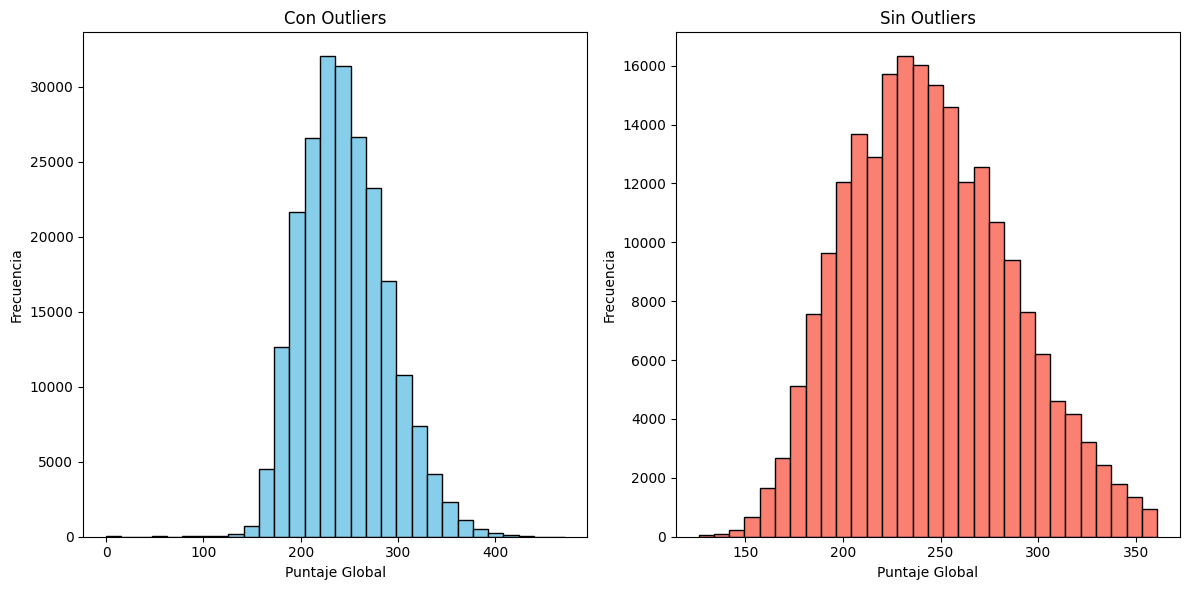

In [60]:
# Crea una figura y ejes para subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma con outliers
axs[0].hist(df_encoded['punt_global'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Con Outliers')
axs[0].set_xlabel('Puntaje Global')
axs[0].set_ylabel('Frecuencia')

# Histograma sin outliers
axs[1].hist(df_final['punt_global'], bins=30, color='salmon', edgecolor='black')
axs[1].set_title('Sin Outliers')
axs[1].set_xlabel('Puntaje Global')
axs[1].set_ylabel('Frecuencia')

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra el plot
plt.show()


#### Por materias

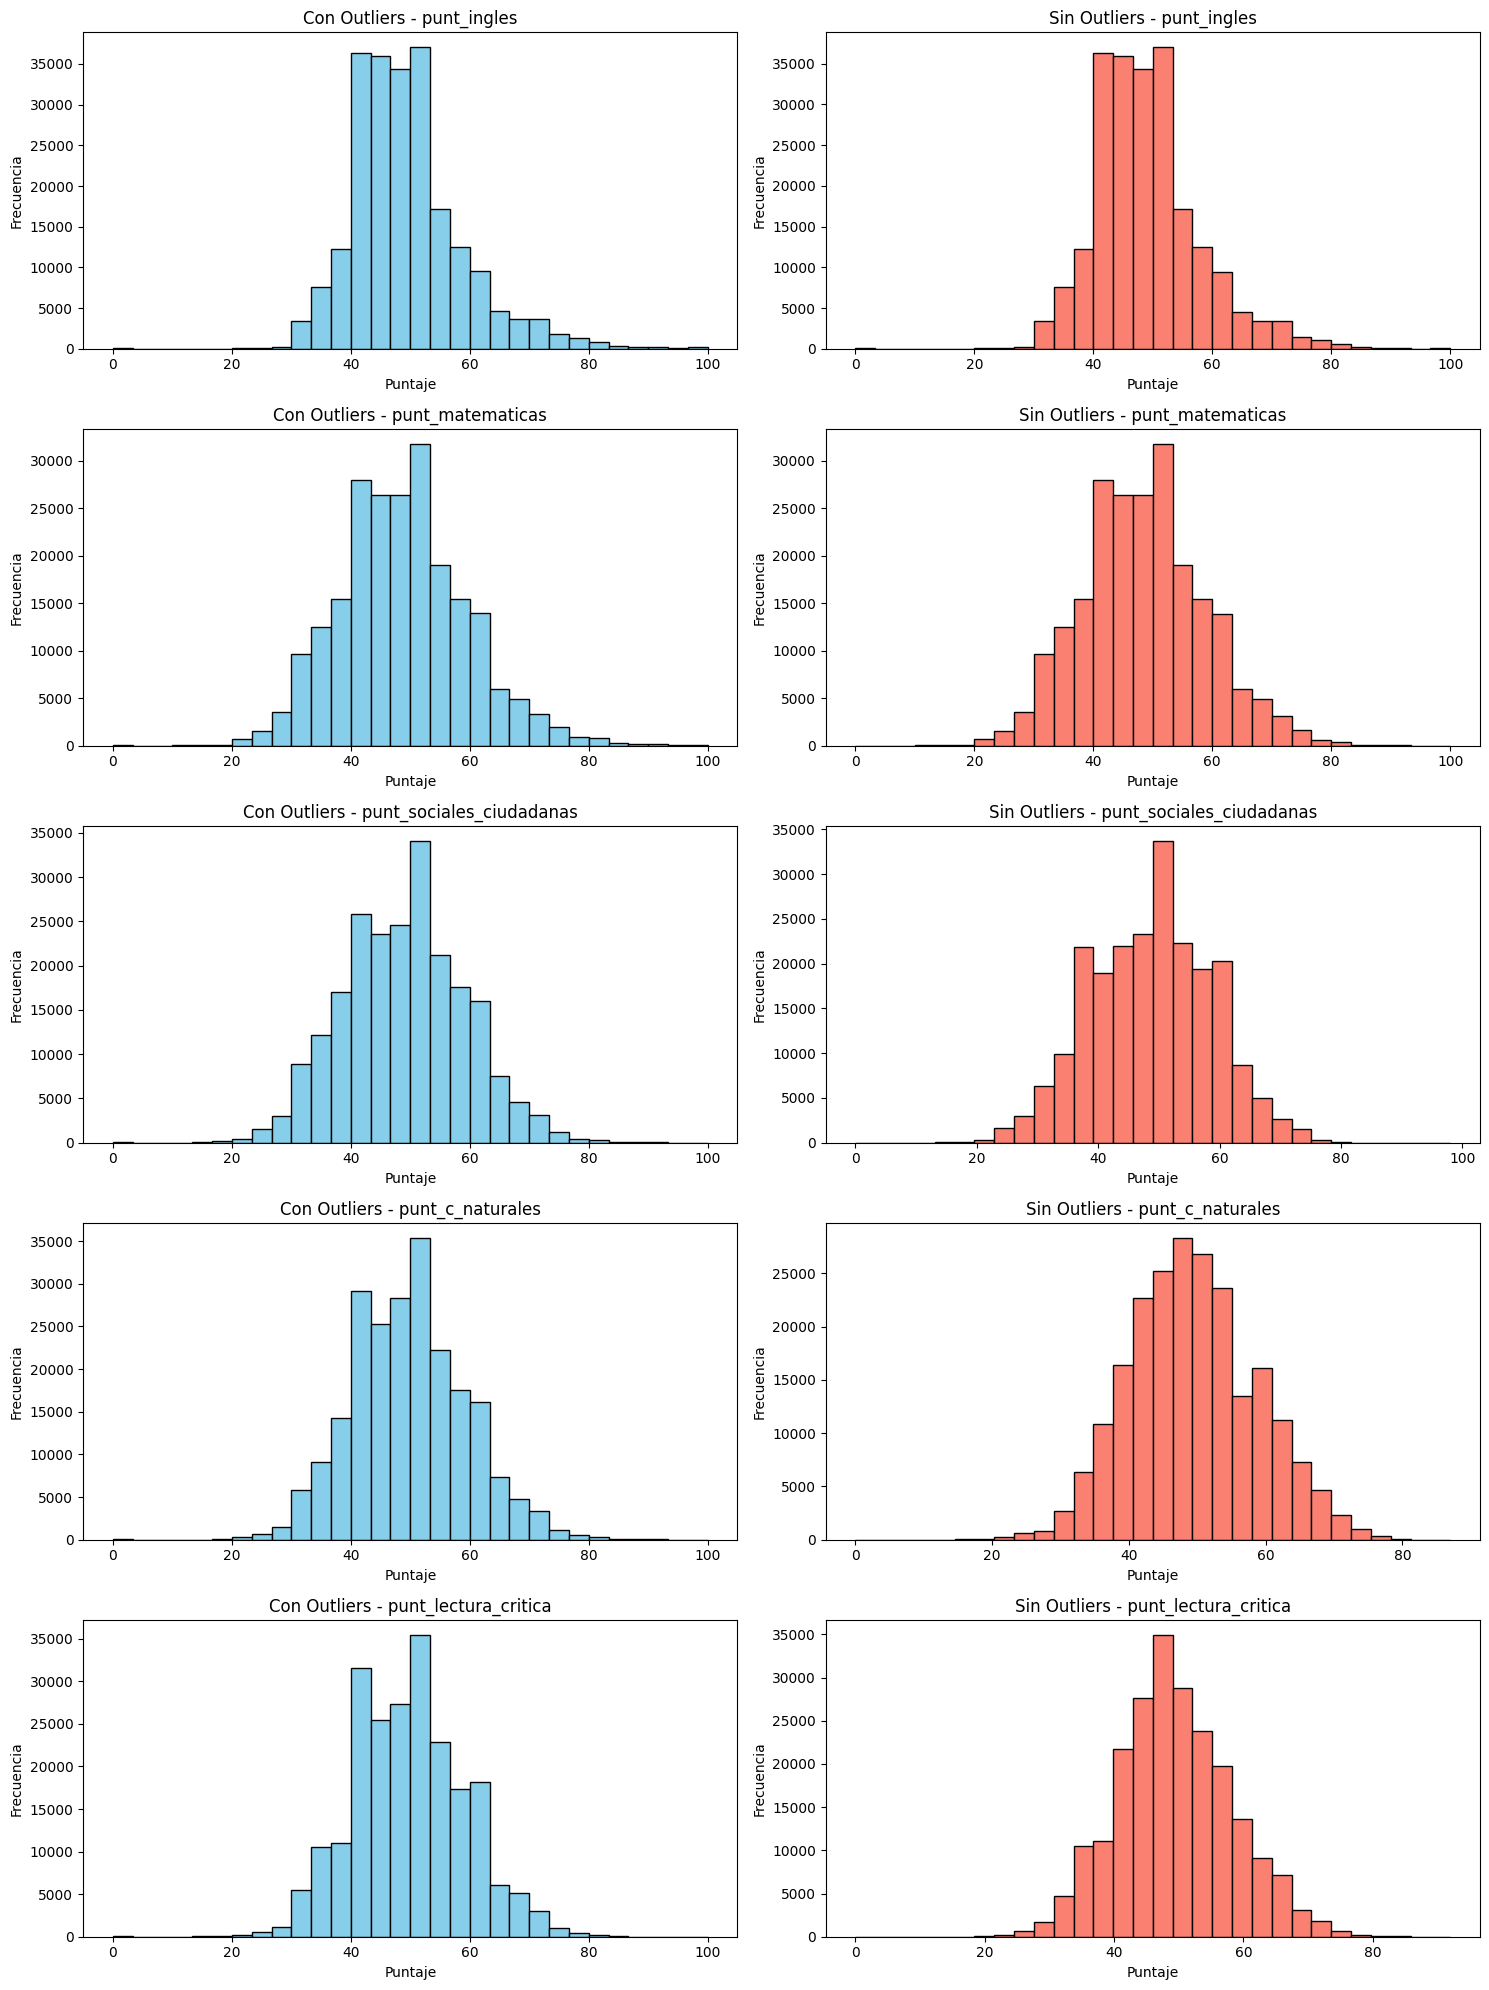

In [61]:
# Variables y configuración
variables = ['punt_ingles','punt_matematicas','punt_sociales_ciudadanas','punt_c_naturales','punt_lectura_critica']
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# Histogramas con y sin outliers
for i, var in enumerate(variables):
    # Histograma con outliers
    axs[i, 0].hist(df_encoded[var], bins=30, color='skyblue', edgecolor='black')
    axs[i, 0].set_title(f'Con Outliers - {var}')
    axs[i, 0].set_xlabel('Puntaje')
    axs[i, 0].set_ylabel('Frecuencia')
    
    # Histograma sin outliers
    axs[i, 1].hist(df_final[var], bins=30, color='salmon', edgecolor='black')
    axs[i, 1].set_title(f'Sin Outliers - {var}')
    axs[i, 1].set_xlabel('Puntaje')
    axs[i, 1].set_ylabel('Frecuencia')

# Ajuste de espaciado entre subplots
plt.tight_layout()

# Mostrar el plot
plt.show()


## 6. Organización final del df

#### Valores numericos y no Booleanos

In [62]:
df_final.replace({True: 1, False: 0}, inplace=True)

/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_61924/3227755663.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final.replace({True: 1, False: 0}, inplace=True)
/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_61924/3227755663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.replace({True: 1, False: 0}, inplace=True)


#### Datos en el nuevo df

In [63]:
print(f"Number of rows before cleaning: {len(df_final)}")

Number of rows before cleaning: 221336


#### Verfiacion final de MV

In [64]:
# Check for missing values
print(df_final.isnull().sum())

periodo                0
estu_consecutivo       0
cole_area_ubicacion    0
cole_calendario        0
cole_naturaleza        0
                      ..
nivel_ing_A-           0
nivel_ing_A1           0
nivel_ing_A2           0
nivel_ing_B+           0
nivel_ing_B1           0
Length: 63, dtype: int64


## 7. Creación del Archivo Pacifico_Cleaned.csv

In [65]:
df_final.to_csv('Pacifico_cleaned.csv', index=False)